# NBA Re-Scoring

In [92]:
#%pip install -r requirements.txt

In [145]:
%load_ext autoreload
%autoreload 1
%aimport utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
import polars as pl
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import utils as u

## Introduction

On February 7th, 2001, Baron Davis, with 0.7 seconds left on the clock and facing full coverage from Lindsey Hunter, [makes a shot from 89 feet](https://www.youtube.com/watch?v=y8HiuYqn7kc). This is the longest made shot in NBA history, and given that an NBA court is 94 feet in length, we may not see a longer shot. Most incredibly, [if you believe the lore](https://www.youtube.com/watch?v=ndmBCqds_gc), Davis said he called his shot.

For his effort, Baron Davis and the Charlotte Hornets were awarded 3 points.

That cannot be fair, right?

## Loading Data

Thank you to https://github.com/DomSamangy/NBA_Shots_04_25 for providing the data, as querying NBA or ESPN data sources is heavily rate-limited or undocumented.

This CSV file contains detailed information on every attempted shot in the NBA from 2004 to 2025.

In [94]:
df = pl.read_csv('NBA_2004_2025_Shots.csv')
print(f"# Rows: {len(df)}")
print(f"Shape: {df.shape}")
df = df.drop(["SEASON_2", "EVENT_TYPE", "ACTION_TYPE", "BASIC_ZONE", "ZONE_NAME", "ZONE_ABB", "ZONE_RANGE", "QUARTER", "MINS_LEFT", "SECS_LEFT"])
print(df.head)

# Rows: 4443714
Shape: (4443714, 24)
<bound method DataFrame.head of shape: (4_443_714, 14)
┌──────────┬────────────┬──────────────┬───────────┬───┬─────────────┬───────┬───────┬─────────────┐
│ SEASON_1 ┆ TEAM_ID    ┆ TEAM_NAME    ┆ PLAYER_ID ┆ … ┆ SHOT_TYPE   ┆ LOC_X ┆ LOC_Y ┆ SHOT_DISTAN │
│ ---      ┆ ---        ┆ ---          ┆ ---       ┆   ┆ ---         ┆ ---   ┆ ---   ┆ CE          │
│ i64      ┆ i64        ┆ str          ┆ i64       ┆   ┆ str         ┆ f64   ┆ f64   ┆ ---         │
│          ┆            ┆              ┆           ┆   ┆             ┆       ┆       ┆ i64         │
╞══════════╪════════════╪══════════════╪═══════════╪═══╪═════════════╪═══════╪═══════╪═════════════╡
│ 2025     ┆ 1610612737 ┆ Atlanta      ┆ 1642258   ┆ … ┆ 3PT Field   ┆ 16.8  ┆ 25.75 ┆ 26          │
│          ┆            ┆ Hawks        ┆           ┆   ┆ Goal        ┆       ┆       ┆             │
│ 2025     ┆ 1610612737 ┆ Atlanta      ┆ 1630552   ┆ … ┆ 2PT Field   ┆ 13.6  ┆ 5.15  ┆ 13          │

## Visualizing Shots

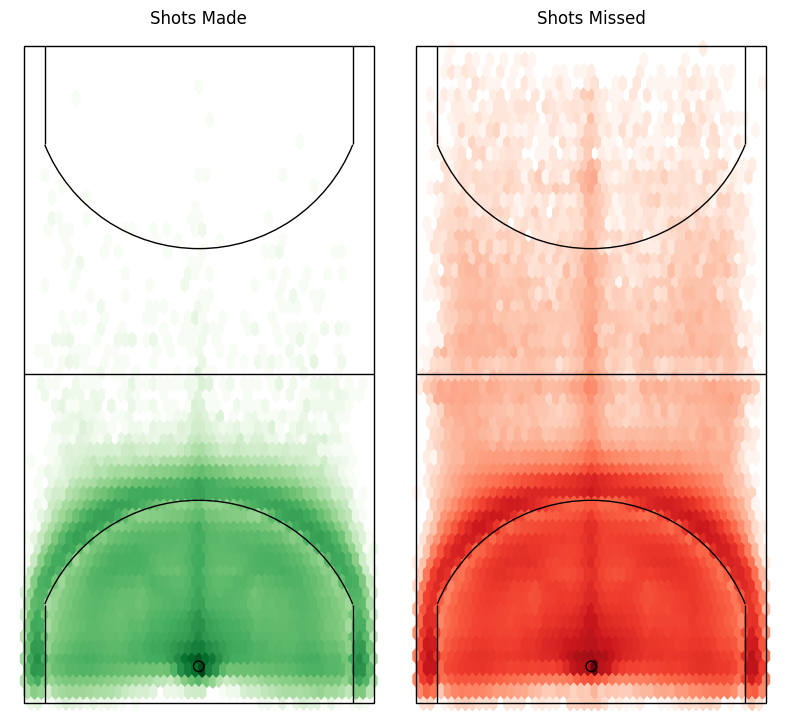

In [ ]:
u.made_missed_shots_density(df)

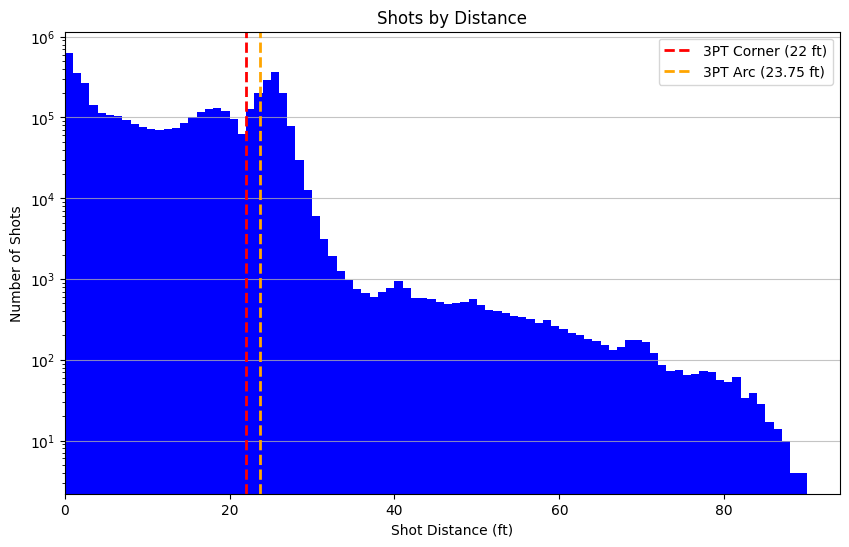

In [176]:
u.plot_shots_by_distance(df)

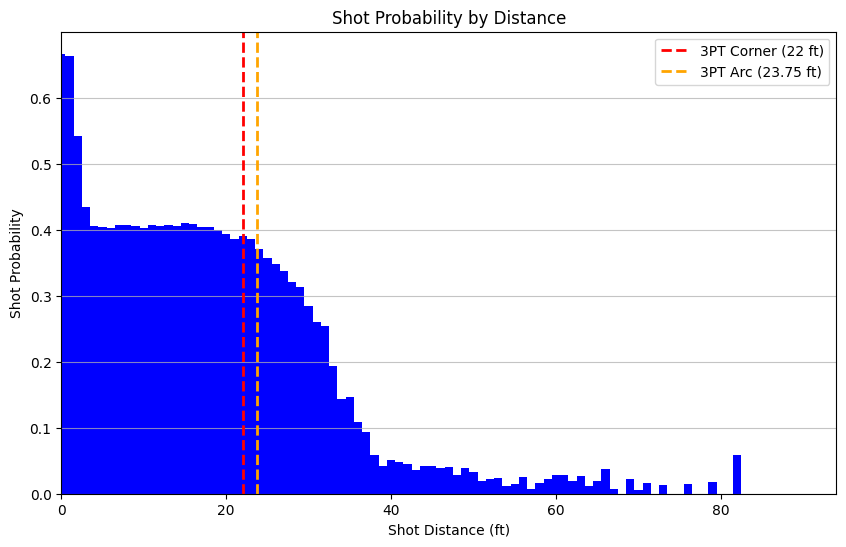

In [175]:
u.plot_shot_prob_by_distance(df)

## Expected Value

In [ ]:
shot_prob_24_25 = u.calculate_shot_probability(df, 24, 25)
print(shot_prob_24_25)

0.36305252265644317


In [ ]:
twopt_shot_prob = u.calculate_shot_probability(df, 0, 20)
twopt_shot_value = twopt_shot_prob * 2 # TODO use SHOT_TYPE filtering
threept_shot_prob = u.calculate_shot_probability(df, 24, 25)
threept_shot_value = threept_shot_prob * 3
print(f"2pt EV: {twopt_shot_value}")
print(f"3pt EV: {threept_shot_value}")

2pt EV: 1.0058101302209463
3pt EV: 1.0891575679693295


In [ ]:
eightyft_shot_prob = u.calculate_shot_probability(df, 80, 200)
print(f"Probability from 80ft: {eightyft_shot_prob}")
targetEV = 1
eightyft_points = targetEV / eightyft_shot_prob
print(f"Deserved points for Target EV of {targetEV}: {eightyft_points}")

Probability from 80ft: 0.007547169811320755
Deserved points for Target EV of 1: 132.5
